In [1]:
# --- Notebook 2: Last Mile Delivery Analysis ---
# --- Cell 1: Load cleaned datasets & setup ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)

# Load cleaned datasets
master = pd.read_csv("../dashboard/data_cleaned/master_clean.csv")
porter = pd.read_csv("../dashboard/data_cleaned/porter_clean.csv")

print("Clean master:", master.shape)
print("Porter clean:", porter.shape)

master.head()


Clean master: (175765, 29)
Porter clean: (175765, 25)


,order_created_at,order_delivered_at,order_date,delivery_time_minutes,total_items,subtotal,min_item_price,max_item_price,order_hour,order_day,is_weekend,is_rush_hour,delivery_bucket,item_count_bucket,order_value_bucket,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,order_id,customer_id,seller_id,price,freight_value,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,customer_city,customer_state
0,2015-02-06 22:24:17,2015-02-06 23:11:17,2015-02-06,47.0,4,3441,557,1239,22,Friday,0,0,40-60 min,3-5 items,High,33.0,14.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-02-10 21:49:25,2015-02-10 22:33:25,2015-02-10,44.0,1,1900,1400,1400,21,Tuesday,0,0,40-60 min,1-2 items,Medium,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-02-16 00:11:35,2015-02-16 01:06:35,2015-02-16,55.0,4,4771,820,1604,0,Monday,0,0,40-60 min,3-5 items,High,8.0,6.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-02-12 03:36:46,2015-02-12 04:35:46,2015-02-12,59.0,1,1525,1525,1525,3,Thursday,0,0,40-60 min,1-2 items,Medium,5.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-27 02:12:36,2015-01-27 02:58:36,2015-01-27,46.0,2,3620,1425,2195,2,Tuesday,0,0,40-60 min,1-2 items,High,5.0,5.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# --- Cell 2: Core Last-Mile KPIs ---

kpi = {
    "Average Delivery Time (min)": round(master['delivery_time_minutes'].mean(), 2),
    "Median Delivery Time (min)": round(master['delivery_time_minutes'].median(), 2),
    "90th Percentile Delivery Time (min)": round(master['delivery_time_minutes'].quantile(0.90), 2),
    "Orders <= 30 min (%)": round((master['delivery_time_minutes'] <= 30).mean() * 100, 2),
    "Orders <= 45 min (%)": round((master['delivery_time_minutes'] <= 45).mean() * 100, 2)
}

kpi_df = pd.DataFrame(kpi, index=["Last-Mile Performance"])
kpi_df


,Average Delivery Time (min),Median Delivery Time (min),90th Percentile Delivery Time (min),Orders <= 30 min (%),Orders <= 45 min (%)
Last-Mile Performance,46.2,45.0,59.0,0.0,52.9


In [3]:
# --- Cell 3: Rush Hour vs Non-Rush Hour Delivery Performance ---

rush_stats = master.groupby("is_rush_hour")['delivery_time_minutes'].agg(['mean', 'median', 'count'])
rush_stats.index = ["Non-Rush Hours", "Rush Hours"]

print("Rush Hour Impact on Delivery Time:")
rush_stats


Rush Hour Impact on Delivery Time:


,mean,median,count
Non-Rush Hours,46.978195,46.0,145289
Rush Hours,42.508925,42.0,30476


In [4]:
# --- Cell 4: Weekend vs Weekday Performance ---

weekend_stats = master.groupby("is_weekend")['delivery_time_minutes'].agg(['mean', 'median', 'count'])
weekend_stats.index = ["Weekday", "Weekend"]

print("Weekend Delivery Performance:")
weekend_stats


Weekend Delivery Performance:


,mean,median,count
Weekday,45.278525,44.0,115020
Weekend,47.954251,47.0,60745


In [5]:
# --- Cell 5: Courier Load Impact on Delivery Time ---

load_corr = master[['delivery_time_minutes', 'total_busy_dashers', 'total_onshift_dashers', 'total_outstanding_orders']].corr()

print("Correlation Between Courier Load and Delivery Time:")
load_corr['delivery_time_minutes']


Correlation Between Courier Load and Delivery Time:


delivery_time_minutes       1.000000
total_busy_dashers          0.206051
total_onshift_dashers       0.171028
total_outstanding_orders    0.385007
Name: delivery_time_minutes, dtype: float64

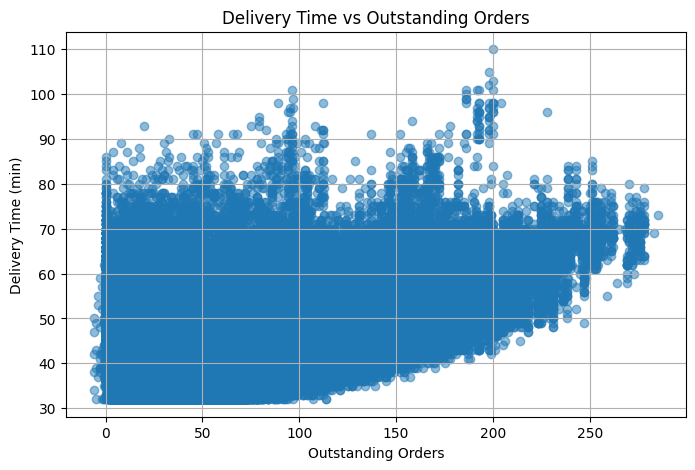

In [6]:
# --- Cell 6: Scatter Plot — Delivery Time vs Outstanding Orders ---

plt.figure(figsize=(8, 5))
plt.scatter(master['total_outstanding_orders'], master['delivery_time_minutes'], alpha=0.5)

plt.title("Delivery Time vs Outstanding Orders")
plt.xlabel("Outstanding Orders")
plt.ylabel("Delivery Time (min)")
plt.grid(True)
plt.show()


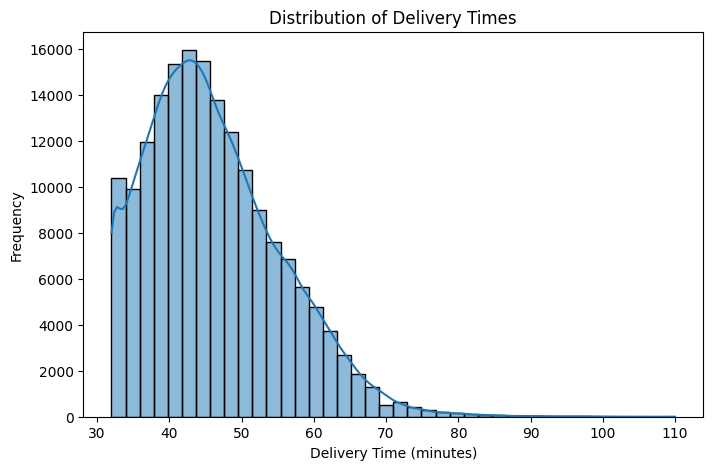

In [7]:
# --- Cell 7: Delivery Time Distribution ---

plt.figure(figsize=(8, 5))
sns.histplot(master['delivery_time_minutes'], bins=40, kde=True)

plt.title("Distribution of Delivery Times")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.show()


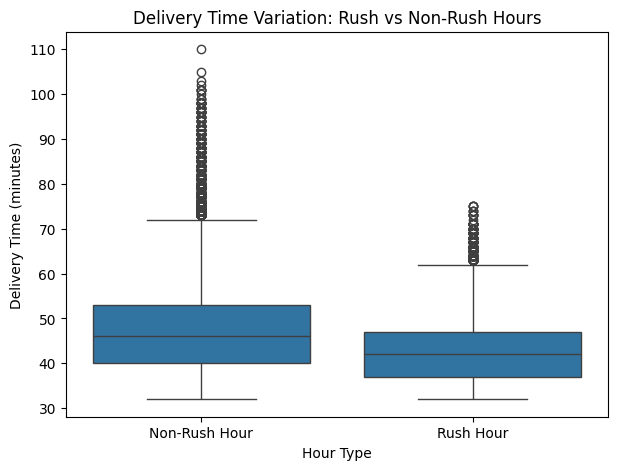

In [8]:
# --- Cell 8: Boxplot — Delivery Time by Rush Hour ---

plt.figure(figsize=(7, 5))
sns.boxplot(data=master, x="is_rush_hour", y="delivery_time_minutes")

plt.xticks([0, 1], ["Non-Rush Hour", "Rush Hour"])
plt.title("Delivery Time Variation: Rush vs Non-Rush Hours")
plt.xlabel("Hour Type")
plt.ylabel("Delivery Time (minutes)")
plt.show()


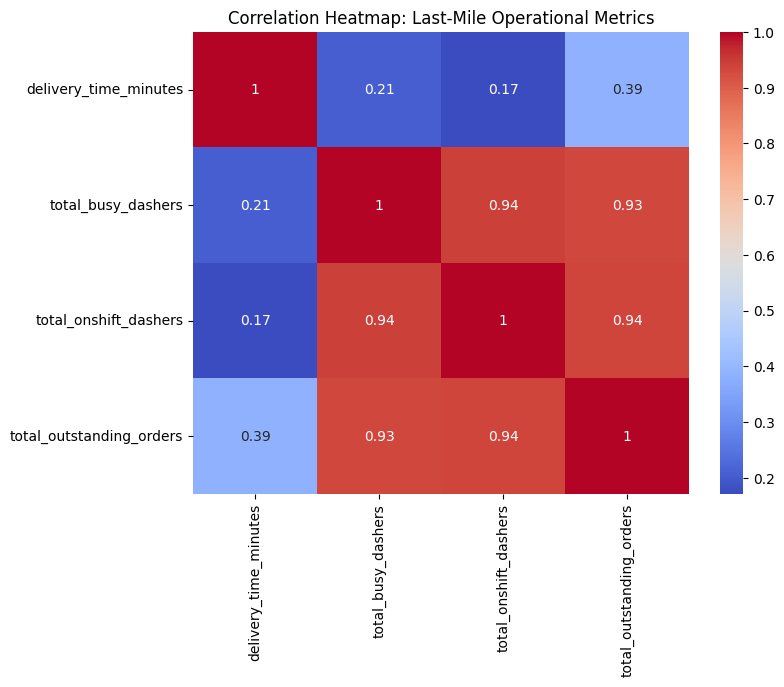

In [9]:
# --- Cell 9: Heatmap — Correlation Matrix for Last Mile Metrics ---

plt.figure(figsize=(8, 6))
sns.heatmap(
    master[['delivery_time_minutes', 'total_busy_dashers', 'total_onshift_dashers', 'total_outstanding_orders']].corr(),
    annot=True,
    cmap="coolwarm"
)

plt.title("Correlation Heatmap: Last-Mile Operational Metrics")
plt.show()


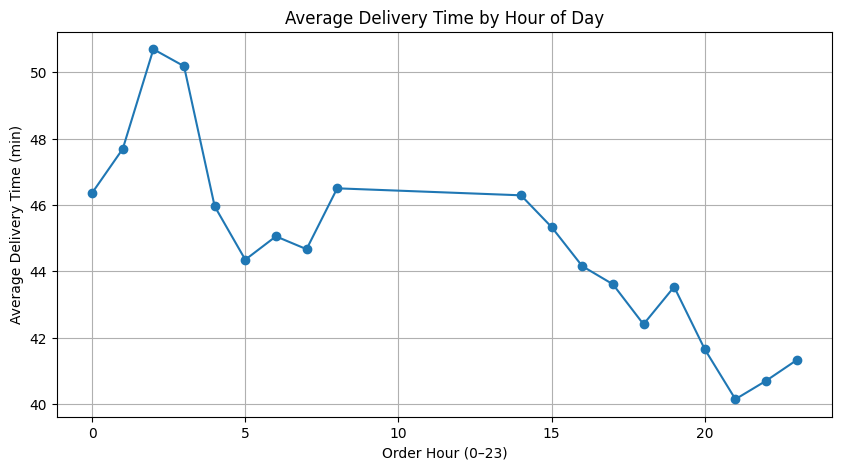

order_hour
0     46.361828
1     47.688555
2     50.690074
3     50.178549
4     45.959239
5     44.350008
6     45.053191
7     44.666667
8     46.500000
14    46.289474
15    45.332669
16    44.156072
17    43.610857
18    42.404962
19    43.532031
20    41.652161
21    40.147373
22    40.701803
23    41.325924
Name: delivery_time_minutes, dtype: float64

In [10]:
# --- Cell 10: Average Delivery Time by Hour of Day ---

hourly = master.groupby("order_hour")['delivery_time_minutes'].mean()

plt.figure(figsize=(10, 5))
plt.plot(hourly.index, hourly.values, marker='o')

plt.title("Average Delivery Time by Hour of Day")
plt.xlabel("Order Hour (0–23)")
plt.ylabel("Average Delivery Time (min)")
plt.grid(True)
plt.show()

hourly


In [11]:
master.columns


Index(['order_created_at', 'order_delivered_at', 'order_date',
       'delivery_time_minutes', 'total_items', 'subtotal', 'min_item_price',
       'max_item_price', 'order_hour', 'order_day', 'is_weekend',
       'is_rush_hour', 'delivery_bucket', 'item_count_bucket',
       'order_value_bucket', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'order_id', 'customer_id', 'seller_id',
       'price', 'freight_value', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'customer_city', 'customer_state'],
      dtype='object')

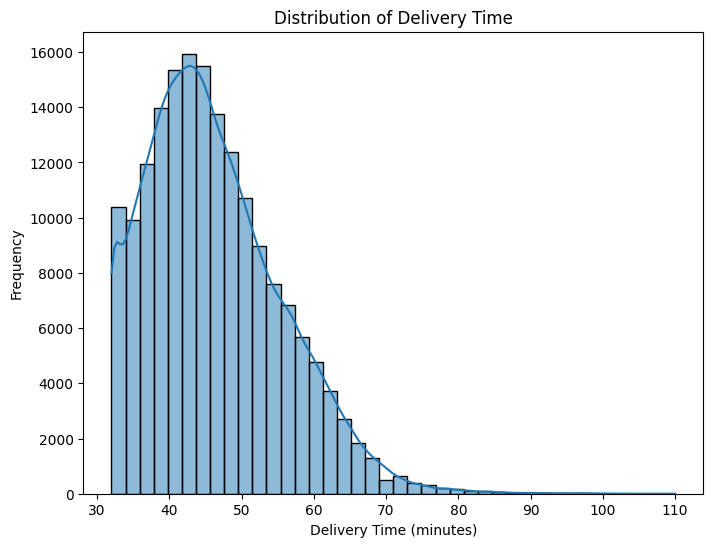

In [12]:
# --- Cell 11: Delivery Time Distribution ---

plt.figure(figsize=(8,6))
sns.histplot(master['delivery_time_minutes'], kde=True, bins=40)

plt.title("Distribution of Delivery Time")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.show()


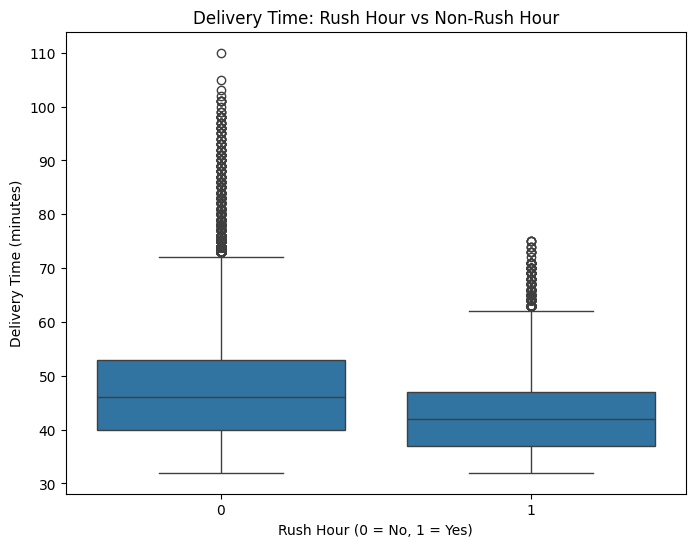

In [13]:
# --- Cell 12: Delivery Time: Rush Hour vs Non-Rush Hour ---

plt.figure(figsize=(8,6))
sns.boxplot(x='is_rush_hour', y='delivery_time_minutes', data=master)

plt.title("Delivery Time: Rush Hour vs Non-Rush Hour")
plt.xlabel("Rush Hour (0 = No, 1 = Yes)")
plt.ylabel("Delivery Time (minutes)")
plt.show()


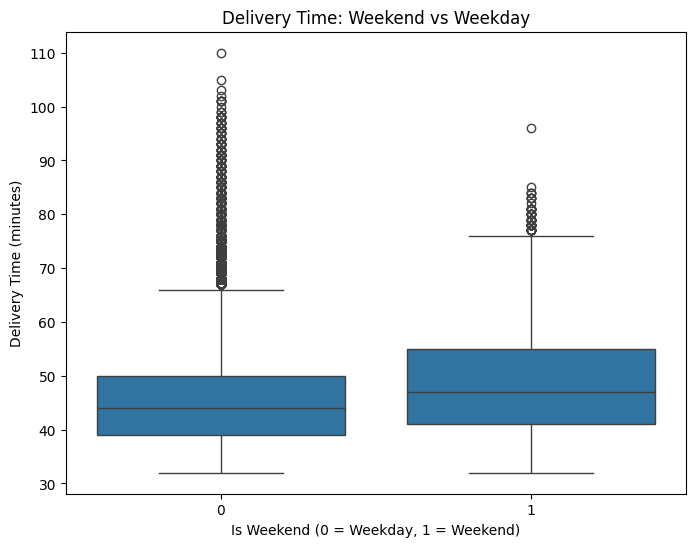

In [14]:
# --- Cell 13: Delivery Time: Weekend vs Weekday ---

plt.figure(figsize=(8,6))
sns.boxplot(x='is_weekend', y='delivery_time_minutes', data=master)

plt.title("Delivery Time: Weekend vs Weekday")
plt.xlabel("Is Weekend (0 = Weekday, 1 = Weekend)")
plt.ylabel("Delivery Time (minutes)")
plt.show()


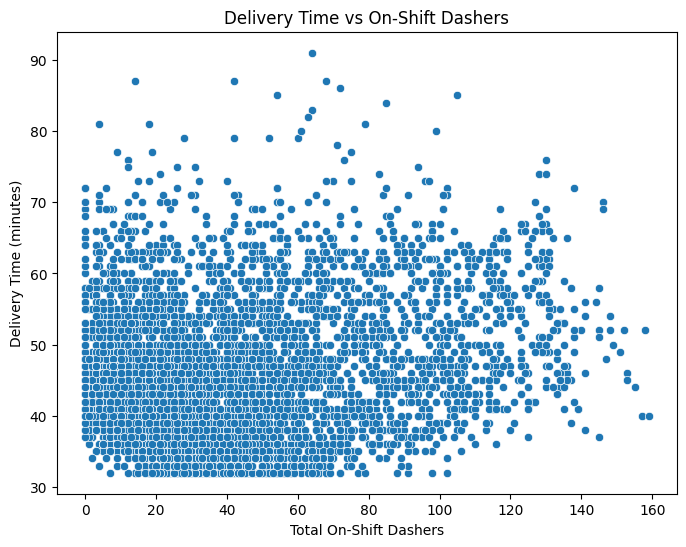

In [15]:
# --- Cell 14: Delivery Time vs Courier Load ---

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=master.sample(min(5000, len(master))),
    x='total_onshift_dashers',
    y='delivery_time_minutes'
)

plt.title("Delivery Time vs On-Shift Dashers")
plt.xlabel("Total On-Shift Dashers")
plt.ylabel("Delivery Time (minutes)")
plt.show()


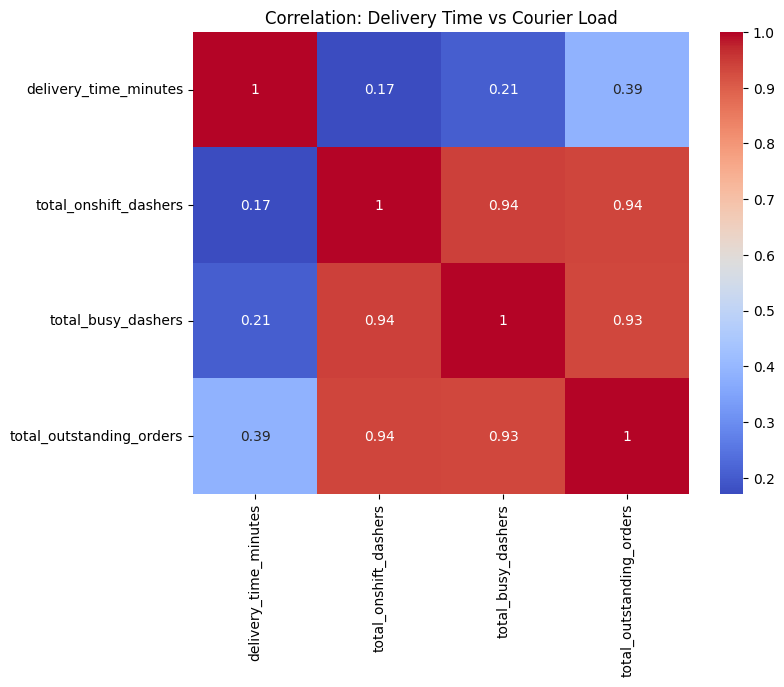

In [16]:
# --- Cell 15: Courier Load Correlation Heatmap ---

load_cols = ['delivery_time_minutes', 'total_onshift_dashers',
             'total_busy_dashers', 'total_outstanding_orders']

corr = master[load_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title("Correlation: Delivery Time vs Courier Load")
plt.show()


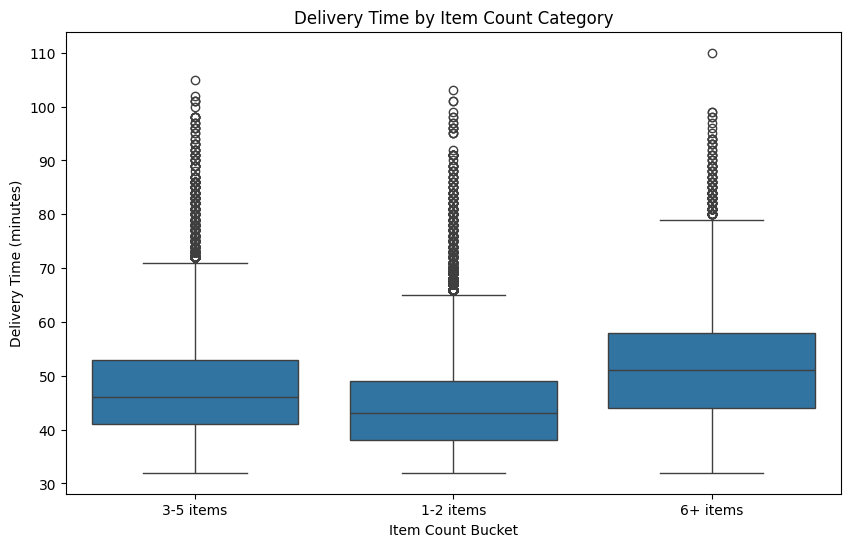

In [17]:
# --- Cell 16: Delivery Time Across Item Count Buckets ---

plt.figure(figsize=(10,6))
sns.boxplot(x='item_count_bucket', y='delivery_time_minutes', data=master)

plt.title("Delivery Time by Item Count Category")
plt.xlabel("Item Count Bucket")
plt.ylabel("Delivery Time (minutes)")
plt.show()


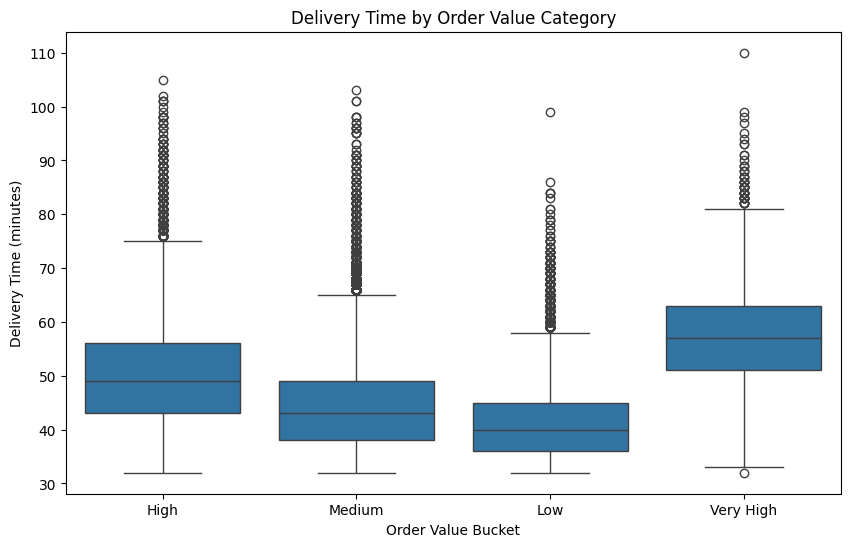

In [18]:
# --- Cell 17: Delivery Time vs Order Value Category ---

plt.figure(figsize=(10,6))
sns.boxplot(x='order_value_bucket', y='delivery_time_minutes', data=master)

plt.title("Delivery Time by Order Value Category")
plt.xlabel("Order Value Bucket")
plt.ylabel("Delivery Time (minutes)")
plt.show()


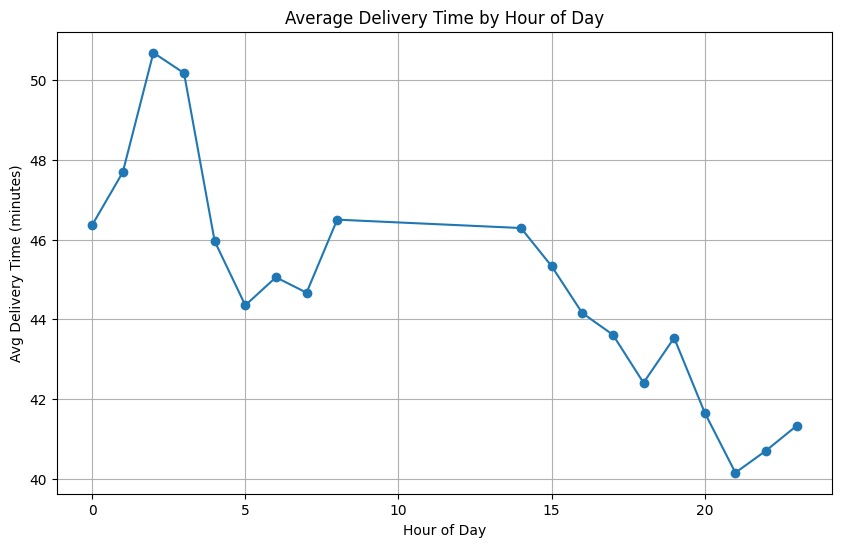

In [19]:
# --- Cell 18: Hourly Delivery Time Trend ---

hourly_trend = master.groupby("order_hour")['delivery_time_minutes'].mean()

plt.figure(figsize=(10,6))
plt.plot(hourly_trend.index, hourly_trend.values, marker='o')

plt.title("Average Delivery Time by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Avg Delivery Time (minutes)")
plt.grid(True)
plt.show()


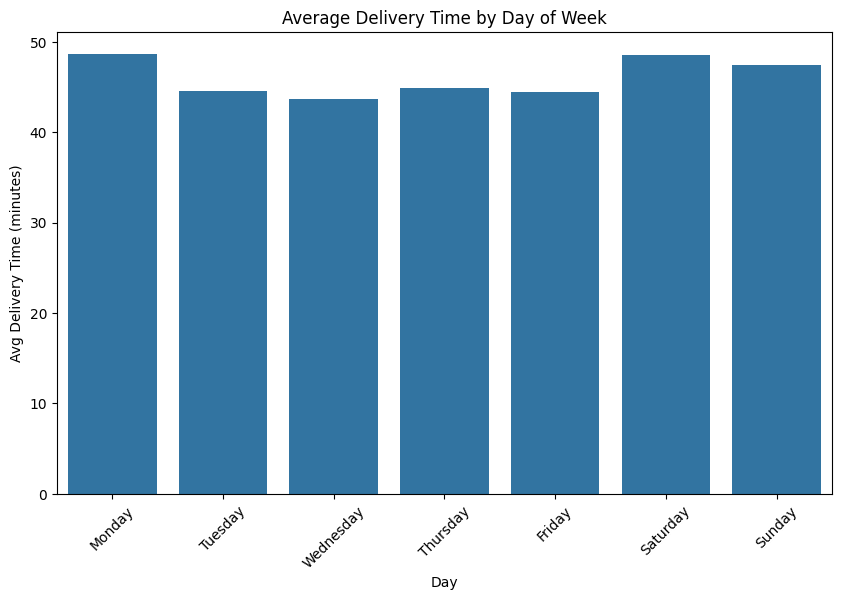

In [20]:
# --- Cell 19: Delivery Time by Day of Week ---

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

daily_trend = master.groupby("order_day")['delivery_time_minutes'].mean().reindex(day_order)

plt.figure(figsize=(10,6))
sns.barplot(x=daily_trend.index, y=daily_trend.values)

plt.title("Average Delivery Time by Day of Week")
plt.xlabel("Day")
plt.ylabel("Avg Delivery Time (minutes)")
plt.xticks(rotation=45)
plt.show()


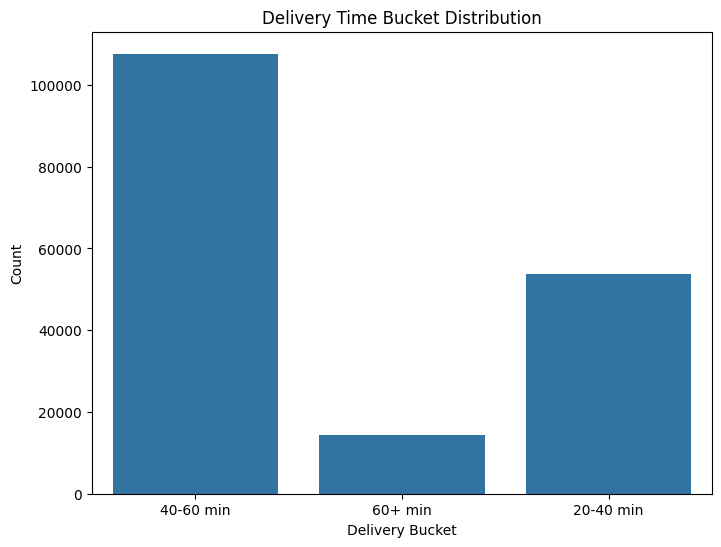

In [21]:
# --- Cell 20: Delivery Time Buckets Distribution ---

plt.figure(figsize=(8,6))
sns.countplot(x='delivery_bucket', data=master)

plt.title("Delivery Time Bucket Distribution")
plt.xlabel("Delivery Bucket")
plt.ylabel("Count")
plt.show()


In [ ]:
master.to_csv("master_clean.csv", index=False)
print("Saved!")





Saved!
